# Brainstorming

Ideas for next post:
* Run next mile interval at speed
* parse track workout files.....for what? 
* What is an issue I am still trying to figure out?
* Muscle soreness
* Balancing muscle/weight gain with the need to fuel properly
* Look up qualifying race course elevation

In [14]:
%matplotlib inline
import sys
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

bq_path = '/Users/aishaellahi/py2/bq'
sys.path.append(bq_path)
import bq

#os.chdir("marathon_tcx/")

In [2]:
bigsur_laps = bq.parse_lap_metrics("20170430_bigsurmarathon.tcx")
nvm_laps = bq.parse_lap_metrics("20150301_nvmmarathon.tcx")

In [3]:
reload(bq)

<module 'bq' from '/Users/aishaellahi/py2/bq/bq.pyc'>

In [10]:
def create_lap_df(lap_list):
    
    '''Returns dataframe of laps with calculated default metrics.'''
    df = pd.DataFrame(lap_list)
    df = df[['run_type', 'run_start', 'lap_start', 'seconds', 'meters', 'start_meters',
                    'end_meters', 'start_altitude', 'end_altitude', 'average_cadence']]
    df['run_start'] = pd.to_datetime(lap_df['run_start'])
    df['lap_start'] = pd.to_datetime(lap_df['lap_start'])
    df.sort_values(['run_start', 'lap_start', 'start_meters'], inplace=True)
    df['minutes'] = lap_df['seconds'].apply(bq.seconds_to_minutes)
    df['miles'] = lap_df['meters'].apply(bq.meters_to_miles)
    df['min_per_mile'] = lap_df['minutes']/lap_df['miles']
    df['alt_change'] = lap_df['end_altitude'] - lap_df['start_altitude']

    # Format 'run_start' to string for labeling
    datetime_index = pd.DatetimeIndex(lap_df['run_start']).normalize()
    df['date'] = datetime_index_df.strftime('%D')
    return df

In [12]:
lap_df = create_lap_df(bigsur_laps)
lap_df.shape

(27, 15)

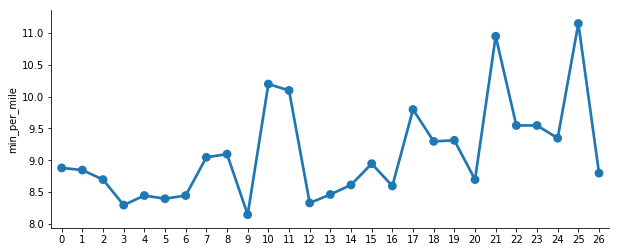

In [16]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.pointplot(x=lap_df.index.tolist(), y=lap_df['min_per_mile'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
# Link to avenue of the giants course
# http://www.theave.org/Images/Marathon.html

# Ideas/questions to explore here
# Pacing throughout a marathon
# Predicting pace from altitude change, and 
# The altitude of my current long run routes